# Fit SSI data with photometric functions

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from ssi import SSI
from ssi.photometry import fit
from ssi.cmap import CondColormap

In [2]:
img = SSI('C0360063913R_cal.pho.cub', align=True)

## Extract data for a line

In [3]:
cond_0 = img.ground & \
       np.greater(img.inc, 0, where=img.ground) & \
       np.less(img.inc, 85, where=img.ground) & \
       np.greater(img.emi, 0, where=img.ground) & \
       np.less(img.emi, 85, where=img.ground)

cond = cond_0 & np.equal(img.line, 200, where=img.ground)

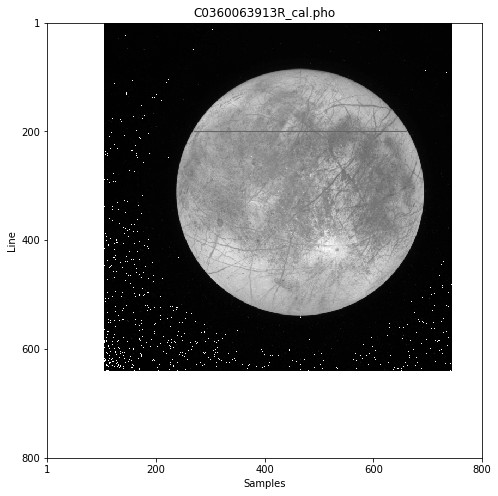

In [4]:
fig, ax = plt.subplots(figsize=(8, 8))

ax.imshow(img.data, cmap='gray', extent=img.extent)
ax.imshow(cond, cmap=CondColormap(), extent=img.extent)

ax.set_xlabel('Samples')
ax.set_ylabel('Line')
ax.set_xticks(img.sticks)
ax.set_yticks(img.lticks)
ax.set_title(img);

In [5]:
(B0, k), (xdata_m, ydata_m), (xfit_m, yfit_m) = fit(img, cond, model='minnaert', debug=True)
(A, f_alpha), (xdata_h, ydata_h), (xfit_h, yfit_h) = fit(img, cond, model='hapke', debug=True)

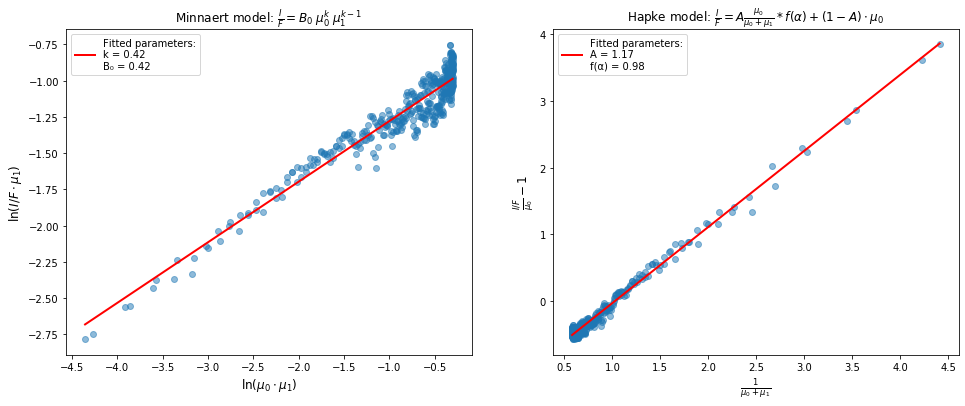

In [6]:
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(16, 6))

ax0.scatter(xdata_m, ydata_m, alpha=.5)
ax0.plot(xfit_m, yfit_m, 'r-', lw=2, label=f'Fitted parameters:\nk = {k:.2f}\nB₀ = {B0:.2f}')
ax0.set_xlabel(r'$\ln(\mu_0 \cdot \mu_1)$', fontsize=12)
ax0.set_ylabel(r'$\ln(I/F \cdot \mu_1)$', fontsize=12)
ax0.set_title(r'Minnaert model: $\frac{I}{F} = B_0 \; \mu_0^k \; \mu_1^{k-1}$')
ax0.legend()

ax1.scatter(xdata_h, ydata_h, alpha=.5)
ax1.plot(xfit_h, yfit_h, 'r-', lw=2, label=f'Fitted parameters:\nA = {A:.2f}\nf(α) = {f_alpha:.2f}')
ax1.set_xlabel(r'$\frac{1}{\mu_0 + \mu_1}$', fontsize=12)
ax1.set_ylabel(r'$\frac{I/F}{\mu_0} - 1$', fontsize=12)
ax1.set_title(r'Hapke model: $\frac{I}{F} = A \frac{\mu_0}{\mu_0 + \mu_1} * f(\alpha) + (1 - A) \cdot \mu_0$')
ax1.legend();

## Extract by geologial units

In [7]:
from ssi.geol import EUROPA

In [8]:
units = EUROPA(img)

In [9]:
plains = cond_0 & (units == 'Ridged plains')
low_alb = cond_0 & (units == 'Low albedo chaos')

c_plains = EUROPA.color('Ridged plains')
c_low_alb = EUROPA.color('Low albedo chaos')

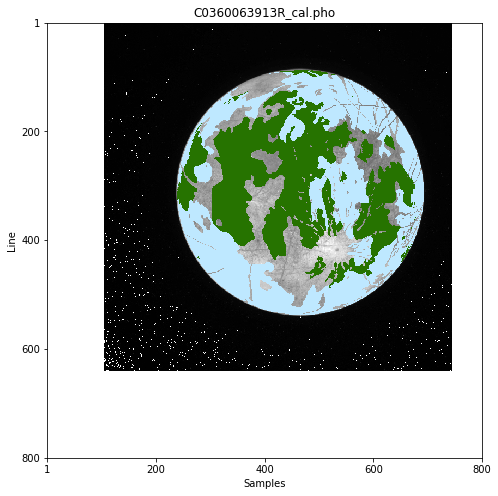

In [10]:
fig, ax = plt.subplots(figsize=(8, 8))

ax.imshow(img.data, cmap='gray', extent=img.extent)
ax.imshow(low_alb, cmap=CondColormap(c_low_alb), extent=img.extent)
ax.imshow(plains, cmap=CondColormap(c_plains), extent=img.extent)

ax.set_xlabel('Samples')
ax.set_ylabel('Line')
ax.set_xticks(img.sticks)
ax.set_yticks(img.lticks)
ax.set_title(img);

In [11]:
(A_low_alb, f_alpha_low_alb), (xdata_h_low_alb, ydata_h_low_alb), (xfit_h_low_alb, yfit_h_low_alb) = fit(img, low_alb, model='hapke', debug=True)
(A_plains, f_alpha_plains), (xdata_h_plains, ydata_h_plains), (xfit_h_plains, yfit_h_plains) = fit(img, plains, model='hapke', debug=True)

(B0_low_alb, k_low_alb), (xdata_m_low_alb, ydata_m_low_alb), (xfit_m_low_alb, yfit_m_low_alb) = fit(img, low_alb, model='minnaert', debug=True)
(B0_plains, k_plains), (xdata_m_plains, ydata_m_plains), (xfit_m_plains, yfit_m_plains) = fit(img, plains, model='minnaert', debug=True)

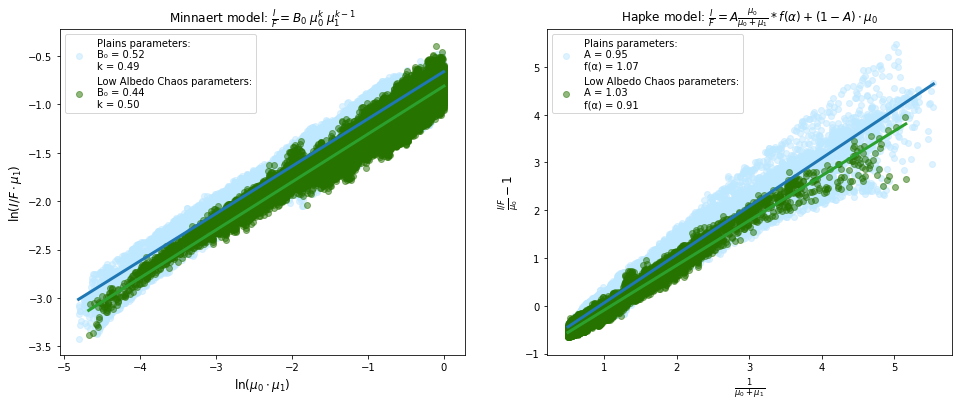

In [12]:
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(16, 6))

ax0.scatter(xdata_m_plains, ydata_m_plains, alpha=.5, color=c_plains,
            label=f'Plains parameters:\nB₀ = {B0_plains:.2f}\nk = {k_plains:.2f}')
ax0.plot(xfit_m_plains, yfit_m_plains, '-', lw=3, color='tab:blue')
ax0.scatter(xdata_m_low_alb, ydata_m_low_alb, alpha=.5, color=c_low_alb,
            label=f'Low Albedo Chaos parameters:\nB₀ = {B0_low_alb:.2f}\nk = {k_low_alb:.2f}')
ax0.plot(xfit_m_low_alb, yfit_m_low_alb, '-', lw=3, color='tab:green')

ax0.set_xlabel(r'$\ln(\mu_0 \cdot \mu_1)$', fontsize=12)
ax0.set_ylabel(r'$\ln(I/F \cdot \mu_1)$', fontsize=12)
ax0.set_title(r'Minnaert model: $\frac{I}{F} = B_0 \; \mu_0^k \; \mu_1^{k-1}$')
ax0.legend();

ax1.scatter(xdata_h_plains, ydata_h_plains, alpha=.5, color=c_plains,
            label=f'Plains parameters:\nA = {A_plains:.2f}\nf(α) = {f_alpha_plains:.2f}')
ax1.plot(xfit_h_plains, yfit_h_plains, '-', lw=3, color='tab:blue')
ax1.scatter(xdata_h_low_alb, ydata_h_low_alb, alpha=.5, color=c_low_alb,
            label=f'Low Albedo Chaos parameters:\nA = {A_low_alb:.2f}\nf(α) = {f_alpha_low_alb:.2f}')
ax1.plot(xfit_h_low_alb, yfit_h_low_alb, '-', lw=3, color='tab:green')

ax1.set_xlabel(r'$\frac{1}{\mu_0 + \mu_1}$', fontsize=12)
ax1.set_ylabel(r'$\frac{I/F}{\mu_0} - 1$', fontsize=12)
ax1.set_title(r'Hapke model: $\frac{I}{F} = A \frac{\mu_0}{\mu_0 + \mu_1} * f(\alpha) + (1 - A) \cdot \mu_0$')
ax1.legend();

## Get only the model parameters

In [13]:
def photo_parameters(img, units=['Ridged Plains', 'Low albedo chaos'], minnaert=True, hapke=True):
    """Get the photometric parameters for a list of units."""
    img = SSI(img, align=True) if isinstance(img, str) else img
    
    res = {
        'img_id': str(img),
        'phase': np.nanmean(img.phase)
    }
    
    geol_units = EUROPA(img)

    if units is None or units == 'all':
        units = np.unique(geol_units[~geol_units.mask].data)
    
    cond_0 = img.ground & \
       np.greater(img.inc, 0, where=img.ground) & \
       np.less(img.inc, 85, where=img.ground) & \
       np.greater(img.emi, 0, where=img.ground) & \
       np.less(img.emi, 85, where=img.ground)
    
    for unit in units:
        cond = cond_0 & (geol_units == unit)
        if cond.any():
            res[unit] = {}
            if minnaert:
                res[unit]['B0'], res[unit]['k'] = fit(img, cond, model='minnaert')
            if hapke:
                res[unit]['A'], res[unit]['f_alpha'] = fit(img, cond, model='hapke')
    return res

In [14]:
res = photo_parameters(img, units=['Ridged plains', 'Low albedo chaos'])
res

{'img_id': 'C0360063913R_cal.pho',
 'phase': 2.1181002,
 'Ridged plains': {'B0': 0.5158492897811912,
  'k': 0.48904360823668236,
  'A': 0.9477082974407836,
  'f_alpha': 1.0652000306648677},
 'Low albedo chaos': {'B0': 0.44401687109505067,
  'k': 0.4952288317943198,
  'A': 1.0276031061112225,
  'f_alpha': 0.9123616891872061}}

In [15]:
def print_results(res):
    """Print photometric parameter results."""
    print(f'{"Cube ID":27s}: {res["img_id"]}')
    print(f'{"Phase angle":27s}: {res["phase"]:.0f}°')
    for unit, params in res.items():
          if unit not in ['img_id', 'phase']:
            values = ' | '.join([f'{k}: {v:6.2f}' for k, v in params.items()])
            print(f'{unit:27s}: {values}')
          
print_results(res)

Cube ID                    : C0360063913R_cal.pho
Phase angle                : 2°
Ridged plains              : B0:   0.52 | k:   0.49 | A:   0.95 | f_alpha:   1.07
Low albedo chaos           : B0:   0.44 | k:   0.50 | A:   1.03 | f_alpha:   0.91


### Get the parameter for all the units on a image

In [16]:
print_results(photo_parameters('C0360063913R_cal.pho.cub', units='all', hapke=False))

Cube ID                    : C0360063913R_cal.pho
Phase angle                : 2°
Bands                      : B0:   0.45 | k:   0.48
Continuous crater ejecta   : B0:   0.82 | k:   1.15
Crater                     : B0:   0.52 | k:   0.56
Discontinuous crater ejecta: B0:   0.57 | k:   0.54
High albedo chaos          : B0:   0.53 | k:   0.50
Knobby albedo chaos        : B0:   0.57 | k:   0.64
Low albedo chaos           : B0:   0.44 | k:   0.50
Molted albedo chaos        : B0:   0.49 | k:   0.51
Ridged plains              : B0:   0.52 | k:   0.49
Unknown                    : B0:   0.37 | k:   0.46


__Note__: When the file name is provided, the alignment is always set to true. Use a `SSI` object to overwrite this function.